<h2>Data Analytics- notebook, bike details data</h2>

<h4><b> Bike details / database of bikes sales:</b></h4>

Used bikes sales data

<h4><b>Data source (url):</b></h4>

<a href="https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset?resource=download">https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset?resource=download</a>

<h4><b>Data format:</b></h4>

single csv-file

<h4><b>Data description and limitations:</b></h4>

This dataset contains information about used motorcycles
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

name
selling price
year
seller type
owner
km driven
ex showroom price



<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [90]:
# importing the usual data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# load the data
bikes = pd.read_csv("BIKE DETAILS.csv")

<h3><b>Code: Data clean-up procedure</b></h3>

In [91]:
# our helper function to create the price difference
# between selling price and ex-showroom price
def percentage_difference(row):
    selling = row['selling_price']
    road = row['ex_showroom_price']

    # the difference in decimal format
    result = 1 - round(selling / road, 2)
    return result

    
# name is not needed here (too unique to have any statistical meaning)
bikes = bikes.drop('name', axis=1)

# since the selling price and present price have a strong correlation,
# let's use our helper function to make the price difference column
bikes['Price_Difference'] = bikes.apply(percentage_difference, axis=1)
 
# let's reorder the columns for easier reading in the data viewer
column_names = ['selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']
bikes = bikes.reindex(columns=column_names)

# the owner and seller_type column seems to be pretty uninteresting in this dataset
bikes = bikes.drop('owner', axis=1)
bikes = bikes.drop('seller_type', axis=1)

<h3><b>Code: Data analysis</b></h3>

<AxesSubplot: >

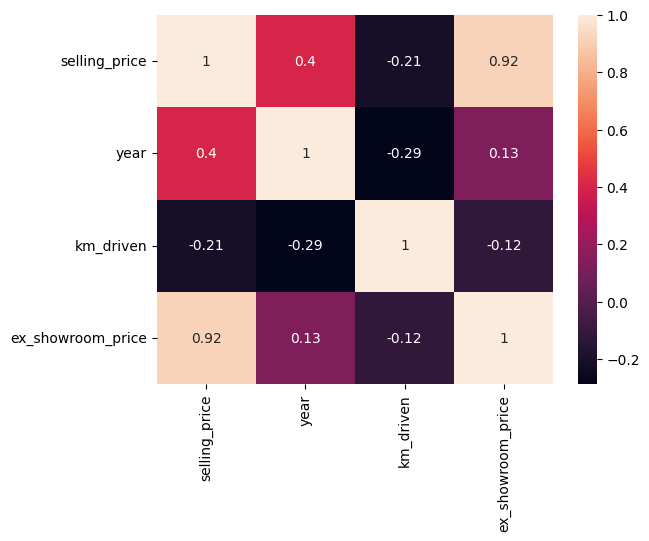

In [92]:
# a test sub dataset to see which bike is 2019 year
bikes_2019 = bikes[bikes['year'] == '2019']

# the amount of extra costs (price difference) is affected by bike year and kms driven
correlations = bikes.corr(numeric_only=True)

# plot correlation matrix
sns.heatmap(correlations, annot=True)

# The price difference has not a strong negative correlation to manufacture
# year and correlation with kilometers driven. Basically this means, old
# bikes with lots of driven kilometers, can not cost more to take into use (Present_Price is not
# much bigger in relation to ex_showroom_price).

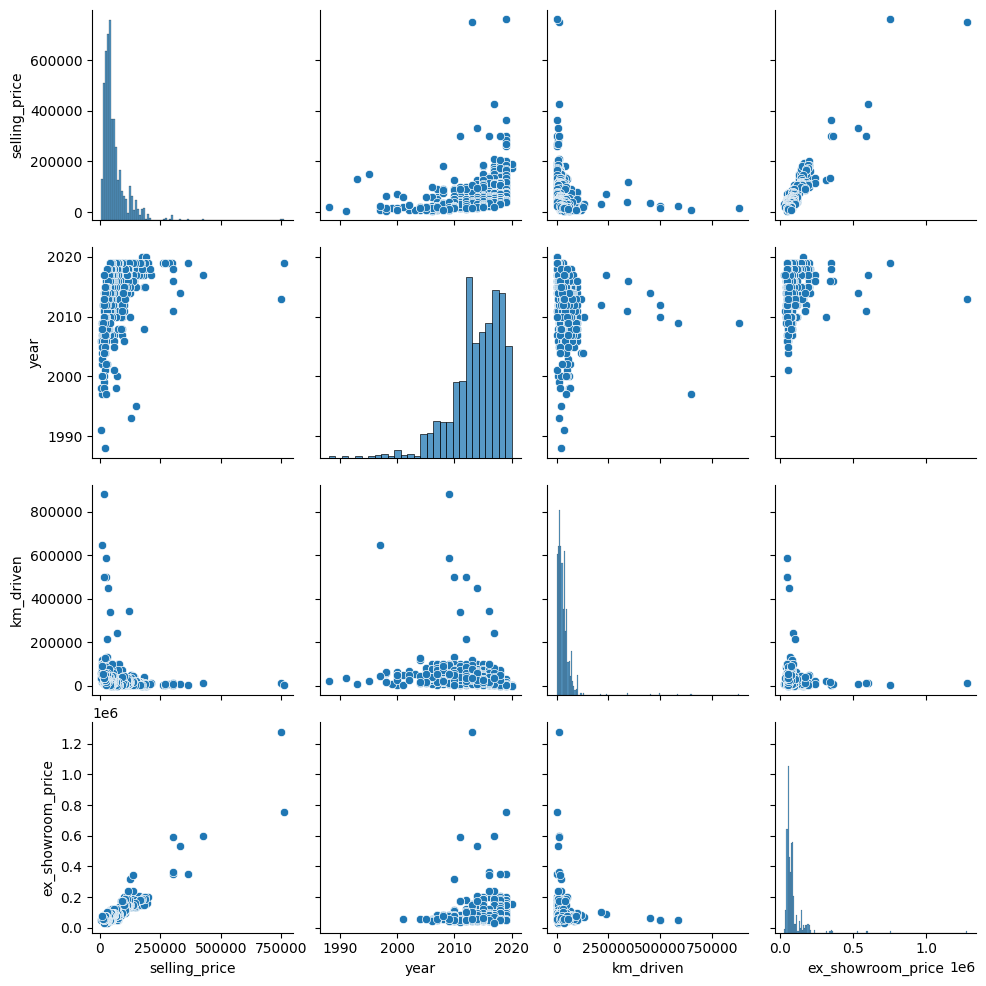

In [93]:
# we can see any correlation between the columns

sns.pairplot(bikes)

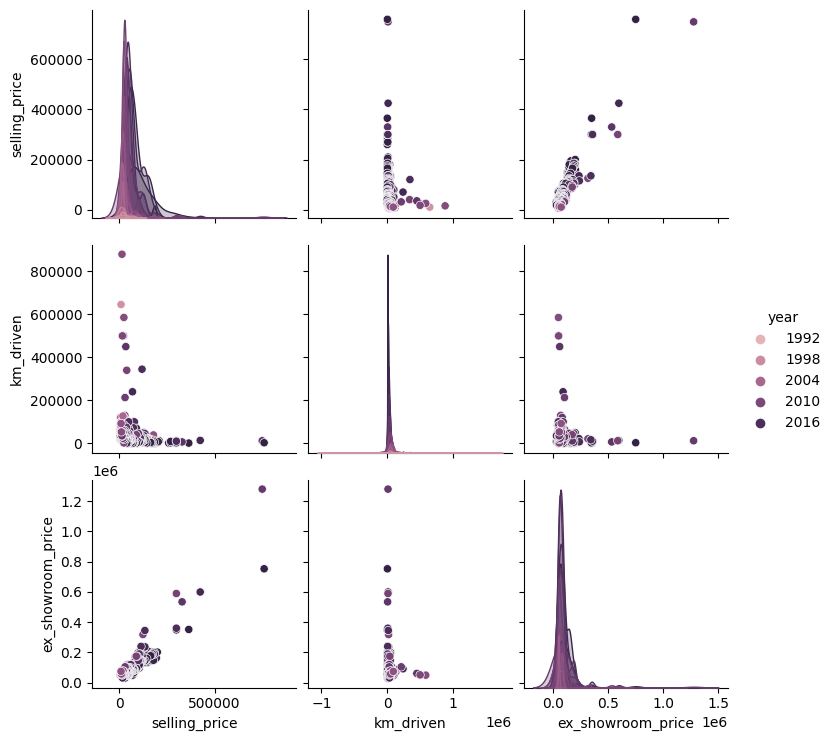

In [94]:
# some old bike sold more expensive than ex_showroom_price, may be started to be antiques
# fresh bike not = cheap bike
sns.pairplot(bikes, hue='year')

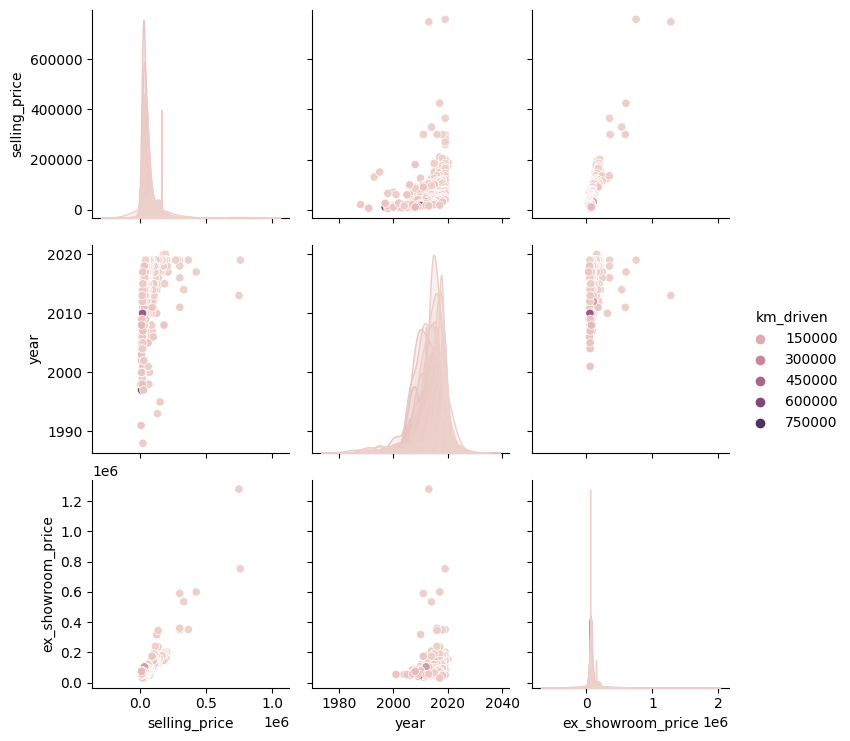

In [95]:
# here is only one 600 000 km + bike 
# here we see that 2010 + bikes almost expensive than < 2010
sns.pairplot(bikes, hue='km_driven')

<AxesSubplot: xlabel='selling_price', ylabel='year'>

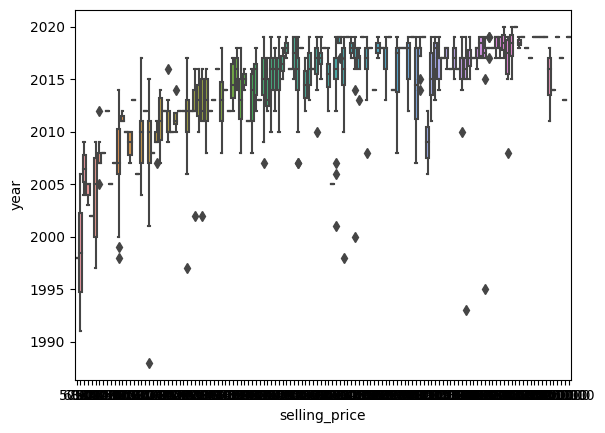

In [96]:
# Box plotting the combination => Transmission/Fuel Type and the price. 
sns.boxplot(x='selling_price', y='year', data=bikes)

# there is no strong correlation between the year of production and the selling price

Based on our analytics, I have come to the conclusion that there is not a strong correlation between the year of bike manufacturing and its selling price. Additionally, bikes do not necessarily lose their value with age, as some become antiques and appreciate in value over time. While mileage does affect the price, its impact is not as significant as it is with cars.

<h3><b>Results and summary:</b></h3>

The economic life of bikes follows its own rules, which are distinct from those of the car market. Bikes tend to depreciate at a slower rate, and the extent of the depreciation depends on the manufacturer. In fact, some bikes can become antiques and actually increase in value over time. Most bikes have a mileage of less than 150,000, which is likely due to the natural limits of their engines' lifespans.

<h3><b>Ideas for further improvements:</b></h3>

It would indeed be interesting to compare the Japanese and European bike markets. Generally, Japanese bikes such as Yamaha and Honda are considered reliable due to their simplistic design with fewer electronic components, which can potentially cause issues over time. On the other hand, European bikes like Ducati and BMW often incorporate more advanced electronic systems, which can provide a superior riding experience but may be more prone to malfunctions.

Analyzing the differences in reliability, performance, and pricing between these two markets could yield valuable insights for bike enthusiasts and industry professionals alike. Additionally, examining the different marketing strategies employed by Japanese and European bike manufacturers could provide a deeper understanding of consumer behavior and preferences across different regions.